#### fish 길이에 따른 무게 예측
- 데이터셋 : fish.csv
- 학습종류 : 지도학습 / 회귀Regression - 값을 예측
- 알고리즘 : 분석 후 결정
- 피쳐 : 길이length
- 타겟: 무게weight



[1] 모듈 로딩 및 데이터 준비

In [23]:
## 1-1
import pandas as pd
# 데이터 분석 및 전처리
import numpy as np
# 숫자처리
import matplotlib.pyplot as plt
# 데이터 시각화

from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 

[2] 데이터분석 -탐색적 분석

In [24]:
## 데이터준비

data_file = '../data/fish.csv'
fishhDF = pd.DataFrame(pd.read_csv(data_file, header=None, 
                                   skiprows=73, skipfooter=31,
                                   usecols=[1,2], engine='python'))
fishhDF.head()
## 1 = length
## 2 = weight

,1,2
0,5.9,8.4
1,32.0,13.7
2,40.0,15.0
3,51.5,16.2
4,70.0,17.4


[2] 데이터분석 -탐색적 분석

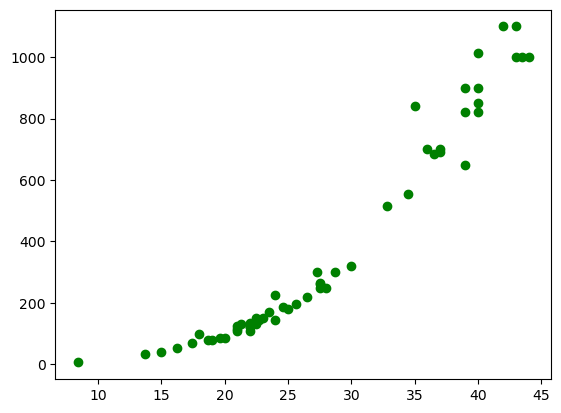

In [25]:
## 무게와 길이의 분포
plt.plot(fishhDF[2], fishhDF[1],'og')
plt.show()

- 탐색적 데이터 분석 결과
    - 데이터 분포 분석: 길이에 따른 무게가 증가하는 양상 보임
    - 주의 


[3] 데이터셋 준비
- 피처와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 => 학습용과 테스트용으로만 분리

In [26]:
## 3-1 피처와 타겟 분리
featureDF = fishhDF[[2]]
targetSR = fishhDF[1]
print(f"featureDF => {featureDF.ndim}D, targetSR => {targetSR.ndim}D")

featureDF => 2D, targetSR => 1D


In [27]:
## 3-2 데이터셋 분리 => 학습용 : 테스트용 75:25 (default ratio)
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size =0.25,
                                                    random_state=5)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (42, 1) / X_test => 2D, (14, 1)
y_train => 1D (42,) / y_test => 2D, (14,)


In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, mean_squared_error

In [29]:
## [4-1] 알고리즘 객체 생성
model = KNeighborsRegressor()

In [30]:
model.fit(X_train, y_train)

KNeighborsRegressor()

In [31]:
print(model.n_features_in_)
print(model.n_samples_fit_)
# print(model.feature_names_in_)
print(model.effective_metric_)
#거리 재는 방법

1
42
euclidean


In [32]:
X_train.index[:3]

Index([17, 33, 4], dtype='int64')

In [33]:
## 4-3 훈련데이터 셋으로 예측 -=> predict(2d)
## - 생성길이에 대한 무게 예측 결과
pre_weight = model.predict(X_train)
pre_weight

array([ 123.  ,  263.6 ,   84.  ,  138.  ,   57.58,   84.  , 1004.  ,
        684.2 ,  749.  ,  263.6 , 1004.  ,  172.  ,  185.6 ,  123.  ,
        808.  ,  161.6 ,  123.  ,  243.  ,  145.  ,  138.  ,  808.  ,
         57.58,  123.  ,  123.  ,  808.  ,  808.  , 1004.  ,  123.  ,
        123.  ,   84.  , 1004.  ,  263.6 ,  185.6 ,  684.2 ,  284.  ,
         95.  ,  104.  ,  123.  ,  684.2 ,  808.  ,  123.  ,  284.  ])

In [34]:
## 모델 성능 평가 ==> score(2D_feature, 1D_target) : 모델 적합도
score = model.score(X_train, y_train)

## 손실 계산값 ==> rmse, mse, mae...(1d_타겟, 1d_predict)
rmse = root_mean_squared_error(y_train, pre_weight)

print(f"[TRAIN] score => {score} rmse => {rmse}")

[TRAIN] score => 0.9779201157650366 rmse => 50.671077220310465


[5]최근접이웃 알고리즘의 동작원리 확인
- k개만큼 가까이 있는 데이터를 추출
- 회귀


In [35]:
#데이터 지정
X_train.head()

,2
17,22.0
33,27.5
4,17.4
21,22.7
0,8.4


In [36]:
y_train.head()

17    135.0
33    250.0
4      70.0
21    145.0
0       5.9
Name: 1, dtype: float64

In [ ]:
## 인덱스 리셋
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

SyntaxError: invalid syntax (603862480.py, line 6)

In [ ]:
#데이터지정
X_train.iloc[0], y_train[0]

(2    22.0
 Name: 0, dtype: float64,
 np.float64(135.0))

In [ ]:
distance, indices = model.kneighbors([[19]])
print(distance, indices)

[[0.  0.6 1.  1.  1.6]] [[29 35  5 36  2]]


In [ ]:
indices = indices.reshape(-1)

In [ ]:
y_train[indices]

29     80.0
35     85.0
5     100.0
36     85.0
2      70.0
Name: 1, dtype: float64

In [ ]:
y_train[indices].index.tolist()
idx = y_train[indices].index.tolist()
idx

[29, 35, 5, 36, 2]

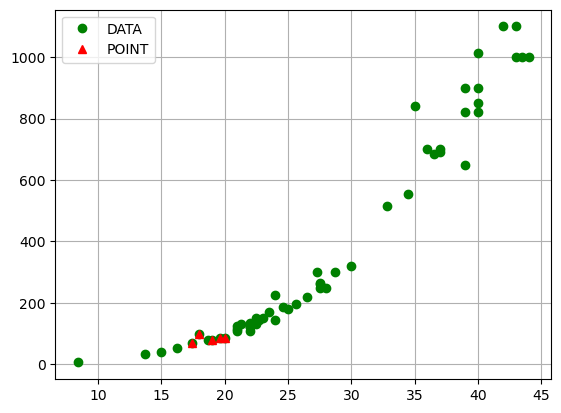

In [ ]:
## 무게와 길이의 분포
plt.plot(fishhDF[2], fishhDF[1],'og', label = 'DATA')
# plt.plot(X_train.iloc[0], y_train[0], '^r', label = 'POINT')
plt.plot(X_train.iloc[idx,:], y_train[indices], '^r', label = 'POINT')

plt.legend()
plt.grid()
plt.show()

In [39]:
pre_weight = X_train.iloc[idx].mean()

print(f" 길이 19 생선의 무게는 {pre_weight}로 예측")


 길이 19 생선의 무게는 2    18.8
dtype: float64로 예측


[6] 최적의 K 찾기 <hr>
- 최근접 이웃 갯수 => k
- 기본값 : 5
- 나의 데이터에 최적인 K 찾기
    * 1~ 전체 데이터 수만큼 K값 변견한 KNR 인스턴스 생성
    * 학습, 예측, 성능평가, 비용계산 결과 비교
    * 성능평가 높고, 비용계산 낮은 K 결정.




In [44]:
# 데이터 개수
train_data = X_train
train_label = y_train
DATANUMS = train_data.shape[0]

#k 갯수에 따른 모델 성능과 비용함수값 저장
HISTORY = [[],[]] # [score_list, rmse_list]
HISTORY = {'score':[], 'rmse':[]}

# k 갯수에 따른 모델 성능 및 비용 계산
for k in range(1, DATANUMS+1):
    #KNR 인스턴스 생성
    model = KNeighborsRegressor(n_neighbors=k)
    
    #KNR 학습 및 예측
    model.fit(train_data, train_label)
    pre_ = model.predict(train_data)
    
    #KNR 성능평가 및 비용계산
    score = model.score(train_data, train_label)
    rmse = root_mean_squared_error(train_label, pre_)
    #저장
    HISTORY['score'].append(score)
    HISTORY['rmse'].append(rmse)
    
    
print(HISTORY)

{'score': [0.9808250160462424, 0.9813994869970336, 0.9795133766182667, 0.979717226905537, 0.9779201157650366, 0.9745528041743983, 0.972288372735127, 0.9719427809133617, 0.9595074231291593, 0.9516899176176579, 0.9413968267250483, 0.9424691123055781, 0.9357303037942397, 0.9221250700704781, 0.9073332171234633, 0.89265009471299, 0.8736538682121048, 0.8536445575797866, 0.8322752094775346, 0.8056672970751678, 0.7793571671517133, 0.7540949447667764, 0.7270310879109629, 0.6997563162485463, 0.6733479647096411, 0.6478056367912929, 0.6199336488517946, 0.5947041920857892, 0.5679404801367253, 0.5378531342396733, 0.5051991791646802, 0.4734766449394294, 0.43908246061619716, 0.3974244993403858, 0.36425755028390994, 0.3193413565141504, 0.2743218987412316, 0.2310989675881806, 0.1745019786126092, 0.11394235269188258, 0.055186364415698796, 0.0], 'rmse': [47.22035477166499, 46.50762930244169, 48.8086654202491, 48.56522522536549, 50.671077220310465, 54.39784647445339, 56.76658330887685, 57.119454703758876, 

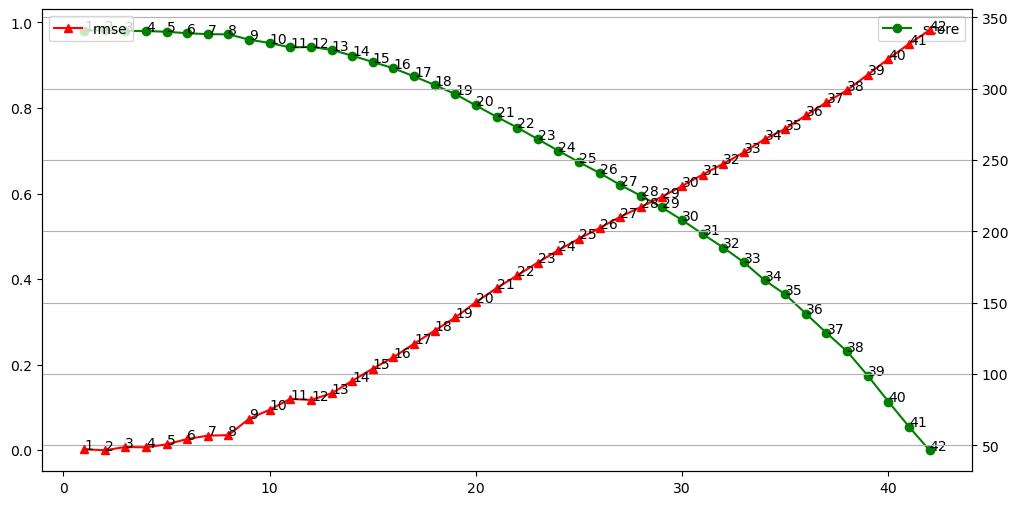

In [78]:
## 무게와 길이의 분포
fig, ax = plt.subplots(figsize= (12,6))
ax.plot(range(1, DATANUMS+1), HISTORY['score'],'og-', label = 'score')
for i in range(1, DATANUMS+1):
    ax.text(i, HISTORY['score'][i-1], str(i))
# score 0~1 1이 이상적
ax2 = plt.twinx(ax)
ax2.plot(range(1, DATANUMS+1), HISTORY['rmse'],'^r-', label = 'rmse')
for i in range(1, DATANUMS+1):
    ax2.text(i, HISTORY['rmse'][i-1], str(i))
    

# rmse 0~1 0이 이상적
# plt.xlabel('k')
# plt.ylabel('rmse')
ax.legend()
ax2.legend()
plt.grid()
plt.show()

1~10 구간이 가장 좋음.
--> 데이터 수가 적어서 나타나는 현상.

In [64]:
print('SCORE', min(HISTORY['score']), max(HISTORY['score']))
print('RMSE', min(HISTORY['rmse']), max(HISTORY['rmse']))

SCORE 0.0 0.9813994869970336
RMSE 46.50762930244169 341.00578060979706


In [ ]:
#테스트 데이터 투입

test_data =  X_test
test_label = y_test
    #KNR 인스턴스 생성
model = KNeighborsRegressor(n_neighbors=8)

#KNR 학습 및 예측
model.fit(test_data, test_label)
pre_ = model.predict(test_data)

#KNR 성능평가 및 비용계산
score = model.score(test_data, test_label)
rmse = root_mean_squared_error(test_label, pre_)

print(score, rmse)

0.8142680331918376 150.875112809166


## 목표 테스트 데이터에 잘 맞는 k값 찾기

ㅓ